In [ ]:
from google.colab import drive
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pip install gradio
!pip install tensorflow
!pip install numpy
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:

# 指定 .zip 檔案的路徑（請替換為您雲端硬碟的實際路徑）
zip_path = '/content/drive/MyDrive/archive.zip'  # 替換為您的檔案路徑
extract_path = '/content/drive/MyDrive/Colab Notebooks/dataset'  # 解壓縮目標資料夾

# 解壓 .zip 檔案
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"資料已解壓縮到 {extract_path}")

資料已解壓縮到 /content/drive/MyDrive/Colab Notebooks/dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 19716 files belonging to 249 classes.
Found 5154 files belonging to 249 classes.
Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.6862 - loss: 2.1769
Epoch 1: val_loss improved from inf to 1.95476, saving model to /content/checkpoints/model_epoch_01.keras
617/617 ━━━━━━━━━━━━━━━━━━━━ 461s 698ms/step - accuracy: 0.6862 - loss: 2.1769 - val_accuracy: 0.7194 - val_loss: 1.9548 - learning_rate: 1.0000e-05
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.6866 - loss: 2.1310
Epoch 2: val_loss improved from 1.95476 to 1.88824, saving model to /content/checkpoints/model_epoch_02.keras
617/617 ━━━━━━━━━━━━━━━━━━━━ 457s 652ms/step - accuracy: 0.6866 - loss: 2.1309 - val_accuracy: 0.7311 - val_loss: 1.8882 - learning_rate: 1.0000e-05
Epoch 3/10
616/617 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.6898 - loss: 2.1080
Epoch 

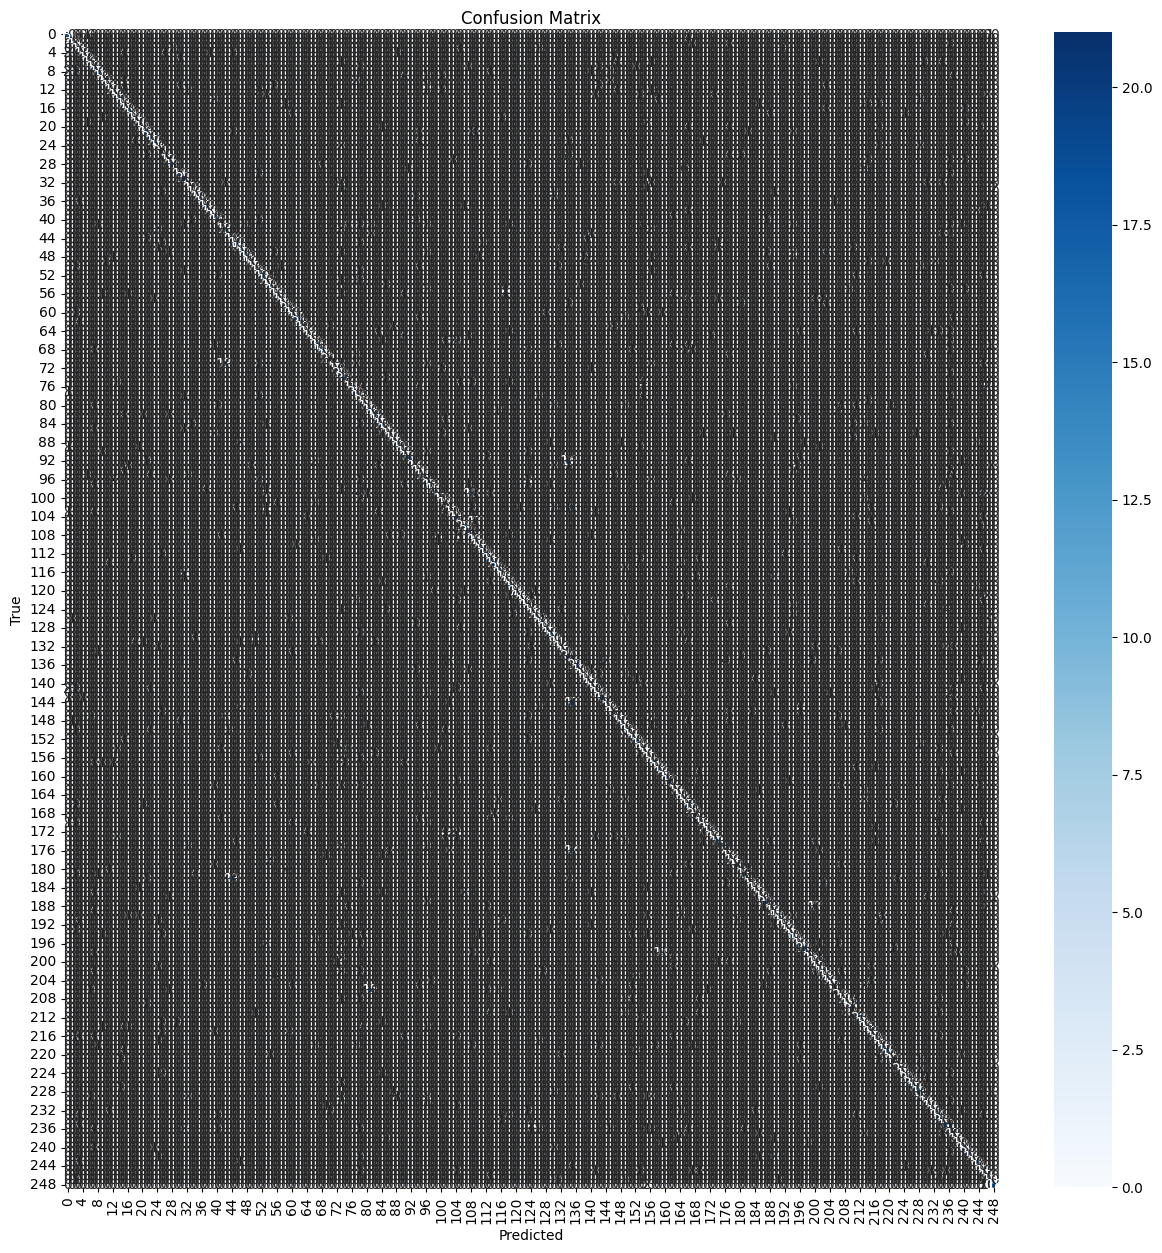

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                      precision    recall  f1-score   support

                         Afghanistan       0.61      0.90      0.73        21
                             Albania       0.91      0.95      0.93        21
                             Algeria       0.62      0.86      0.72        21
                      American Samoa       0.65      0.71      0.68        21
                             Andorra       0.93      0.62      0.74        21
                              Angola       0.86      0.90      0.88        21
                            Anguilla       0.75      0.71      0.73        21
                          Antarctica       0.57      0.81      0.67        21
                 Antigua and Barbuda       0.79      0.71      0.75        21
                           Argentina       0.73      0.76      0.74        21
                             Armenia       0.94      0.81      0.87        21
                               Aruba       0.83      0.71      

In [ ]:
# Step 1: 掛載 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Step 2: 載入現有的 .keras 模型
model_path = "/content/drive/My Drive/model_epoch_50.keras"  # 替換為您的模型路徑
model = load_model(model_path)

# Step 3: 解凍部分層進行微調
# 讓模型基礎部分（如 ResNet50）可訓練
base_model = model.layers[0]  # 假設 ResNet50 是模型的第一層
base_model.trainable = True  # 解凍整個基礎模型

# 鎖定前面的層，只解凍後 100 層
for layer in base_model.layers[:-100]:  # 解凍最後 100 層
    layer.trainable = False

# Step 4: 重新編譯模型（使用較低學習率）
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Step 5: 準備數據集
train_path = "/content/drive/MyDrive/Colab Notebooks/dataset/flags/train"  # 替換為您的訓練集路徑
test_path = "/content/drive/MyDrive/Colab Notebooks/dataset/flags/test"   # 替換為您的測試集路徑
image_size = (224, 224)
batch_size = 32

# 載入數據集
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=image_size,
    batch_size=batch_size
)

# Step 6: 強化數據增強
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.3),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.3),
])

def preprocess(image, label):
    image = data_augmentation(image)
    image = tf.cast(image, tf.float32) / 255.0  # 正規化到 [0, 1]
    return image, label

train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

# Step 7: 訓練回調
checkpoint_dir = "/content/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, "model_epoch_{epoch:02d}.keras")
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor="val_loss",
    verbose=1
)

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Step 8: 繼續訓練模型
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,  # 增加 epochs 數量
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

# Step 9: 評估模型性能
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 生成預測結果
y_true = []
y_pred = []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# 繪製混淆矩陣
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 輸出分類報告
class_names = sorted(os.listdir(train_path))  # 從數據集獲取類別名稱
print(classification_report(y_true, y_pred, target_names=class_names))

# Step 10: 保存最終模型
final_model_path = "/content/drive/My Drive/model_epoch_60.keras"
model.save(final_model_path)
print(f"模型已保存到: {final_model_path}")


In [ ]:
!pip install gradio

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import gradio as gr
from PIL import Image
import numpy as np

# Step 1: 掛載 Google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

# Step 2: 指定 .keras 模型的路徑
model_path = "/content/drive/MyDrive/model_epoch_30.keras"  # 替換為您的模型路徑
model = load_model(model_path)

# # Step 3: 定義類別名稱 (如果需要手動設定)
import os

train_path = "/content/drive/MyDrive/Colab Notebooks/dataset/flags/train"  # 替換為訓練集的路徑
class_names = sorted(os.listdir(train_path))  # 獲取資料夾名稱並排序
print(f"類別名稱: {class_names}")
print(f"類別數量: {len(class_names)}")

# Step 4: 定義預測函數
def predict_flag(image):
    # 預處理圖片
    image = image.resize((224, 224))  # 確保大小與模型輸入匹配
    image = np.array(image) / 255.0  # 正規化
    image = np.expand_dims(image, axis=0)  # 增加批次維度

    # 模型預測
    predictions = model.predict(image)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return f"國旗: {predicted_class}, 置信度: {confidence:.2f}"

# Step 5: 建立 Gradio 接口
interface = gr.Interface(
    fn=predict_flag,
    inputs=gr.Image(type="pil", label="上傳國旗圖片"),
    outputs="text",
    title="國旗分類 AI",
    description="上傳國旗圖片，AI 將自動辨識國家的名稱。"
)

# Step 6: 啟動 Gradio 接口
interface.launch()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
類別名稱: ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Åland Islands', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'DR Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican 